<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/sleap_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install sleap
!pip uninstall -y opencv-python opencv-contrib-python > /dev/null 2>&1
!pip install sleap > /dev/null 2>&1
!apt install tree > /dev/null 2>&1
!pip install cattr
import sleap
# !wget https://storage.googleapis.com/sleap-data/reference/flies13/td_fast.210505_012601.centered_instance.n%3D1800.zip > /dev/null 2>&1
# !unzip -o -d "td_fast.210505_012601.centered_instance.n=1800" "td_fast.210505_012601.centered_instance.n=1800.zip" > /dev/null 2>&1

ERROR: Could not find a version that satisfies the requirement Cattr (from versions: none)
ERROR: No matching distribution found for Cattr


ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# mount the drive to the folder with your model files
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Julia/")

from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
import pandas as pd


import sleap
sleap.versions()
sleap.system_summary()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


ModuleNotFoundError: ignored

In [ ]:
!tree 220721_142423.centroid.n=300

In [ ]:
# import various libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use("seaborn-deep")
sleap.versions()

SLEAP: 1.3.1
TensorFlow: 2.8.4
Numpy: 1.22.4
Python: 3.10.12
OS: Linux-5.15.109+-x86_64-with-glibc2.35


<ipython-input-2-382436f1fdd6>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-deep")


vis.tp
vis.fp
vis.tn
vis.fn
vis.precision
vis.recall
dist.dists
dist.avg
dist.p50
dist.p75
dist.p90
dist.p95
dist.p99
pck.thresholds
pck.pcks
pck.mPCK_parts
pck.mPCK
oks.mOKS
oks_voc.match_score_thresholds
oks_voc.recall_thresholds
oks_voc.match_scores
oks_voc.precisions
oks_voc.recalls
oks_voc.AP
oks_voc.AR
oks_voc.mAP
oks_voc.mAR
pck_voc.match_score_thresholds
pck_voc.recall_thresholds
pck_voc.match_scores
pck_voc.precisions
pck_voc.recalls
pck_voc.AP
pck_voc.AR
pck_voc.mAP
pck_voc.mAR
Error distance (50%): 0.9233565838982496
Error distance (90%): 2.054955845185083
Error distance (95%): 2.5246123094775297


Text(0.5, 0, 'Localization error (px)')

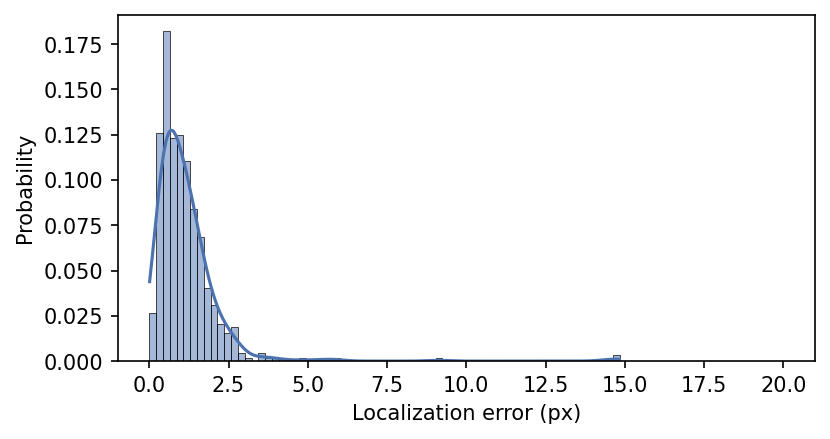

In [ ]:
# load model metrics

metrics = sleap.load_metrics('220721_144845.centered_instance.n=300', split="val")
print("\n".join(metrics.keys()))

# look at the summary of localization errors
print("Error distance (50%):", metrics["dist.p50"])
print("Error distance (90%):", metrics["dist.p90"])
print("Error distance (95%):", metrics["dist.p95"])

# visualize the distribution of localization errors for the model

plt.figure(figsize=(4, 3), dpi=150, facecolor="w")
sns.histplot(metrics["dist.dists"].flatten(), binrange=(0, 20), kde=True, kde_kws={"clip": (0, 20)}, stat="probability")
plt.xlabel("Localization error (px)")
plt.savefig('/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/SLEAP_tracking_example_frames/model_evaluation.pdf')
plt.show()